# Edamame classification module

In [1]:
import edamame
import edamame.eda as eda
from edamame.classifier import TrainClassifier, classifier_metrics
import pandas as pd
import numpy as np
from sklearn import datasets
print(edamame.__version__)

0.53


### Upload dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(150, 4)
<class 'numpy.ndarray'>
(150,)
<class 'numpy.ndarray'>


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = pd.DataFrame(X, columns=iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = pd.DataFrame(y, columns=['y'])
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [6]:
X_train, y_train, X_test, y_test = eda.setup(X,y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112, 1)
(38, 1)


In [7]:
X_train_s = eda.scaling(X_train)
X_test_s = eda.scaling(X_test)
print(X_train_s.shape)
print(X_train_s.head())
print(X_test_s.shape)
print(X_test_s.head())

(112, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
4            -1.018271          1.286460          -1.393389         -1.362177
32           -0.773010          2.435452          -1.335503         -1.496476
142          -0.037227         -0.781725           0.748378          0.920908
85            0.208034          0.826864           0.401064          0.518011
86            1.066448          0.137469           0.516836          0.383712
(38, 4)
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73            0.256211         -0.719037           0.589872          0.055859
18           -0.212994          1.616298          -1.038346         -1.067895
118           2.133031         -1.186104           1.783898          1.429337
78            0.138909         -0.485504           0.481324          0.430444
76            1.077320         -0.719037           0.644146          0.305582


## Classification models

In [8]:
classifier = TrainClassifier(X_train_s, y_train, X_test_s, y_test)
svm = classifier.svm()

### svm model metrics:

TypeError: 'bool' object is not callable

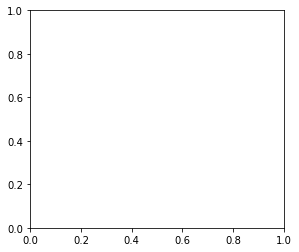

In [11]:
classifier.model_metrics(model_name="svm", confusion_matrix=True)

In [10]:
classifier.save_model(model_name="svm")

In [11]:
svm_upload = eda.load_model(path='svm.pkl')
svm_upload.kernel

'linear'

#### Model metrics:

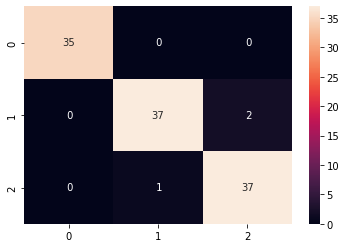

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      0.95      0.96        39
           2       0.95      0.97      0.96        38

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112



In [13]:
classifier_metrics(svm_upload, X=X_train_s, y=y_train)

### Metrics results on train set:

,CV Mean,Std
Logistic,0.954941,0.049799
Gaussian NB,0.936759,0.068140
KNN,0.946245,0.034239
Tree,0.937154,0.054172
Random forest,0.945850,0.066863
Xgboost,0.946245,0.044708
SVM,0.954941,0.070422


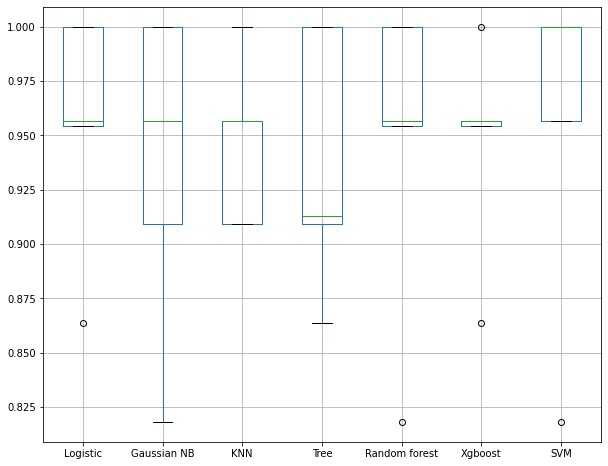

In [14]:
models = classifier.auto_ml()